<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/visualizaciondedatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos
## Ejercicio de volúmenes de ventas con matplotlib

In [ ]:
pip install plotly_express

In [ ]:
import plotly_express as px
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('eu_sample_2.csv', sep=',')
df.head()

,YR,PRD,MONTH,DATE,SCENRO,MU,BU,SCTR,CNTRY,SUBBRAND,AMT
0,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1233,20969.017914
1,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1259,141.987137
2,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_24,1058.399611
3,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_837,30813.110677
4,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_956,2254.041831


Vamos a explorar la bbd y ver como esta si hay valores faltantes o si todos los datos son buenos

In [ ]:
valores_faltantes = df.isnull().sum()
print(valores_faltantes)

YR          0
PRD         0
MONTH       0
DATE        0
SCENRO      0
MU          0
BU          0
SCTR        0
CNTRY       0
SUBBRAND    0
AMT         0
dtype: int64


Como una la bbdd solo contiene datos entre 2017 y 2018 vamos a ver si esta bien

In [ ]:
resumen_estadistico = df.describe()
print(resumen_estadistico)

                YR          PRD        MONTH           AMT
count  5399.000000  5399.000000  5399.000000  5.399000e+03
mean   2017.510835     7.628820     6.628820  1.972712e+05
std       0.499929     3.466565     3.466565  6.769013e+05
min    2017.000000     2.000000     1.000000 -1.509378e+05
25%    2017.000000     5.000000     4.000000  7.108339e+03
50%    2018.000000     8.000000     7.000000  2.861272e+04
75%    2018.000000    11.000000    10.000000  9.838589e+04
max    2018.000000    13.000000    12.000000  9.808218e+06


In [ ]:
# Lista de columnas que deseas analizar
columnas = ['DATE', 'SCENRO', 'MU', 'BU', 'SCTR', 'CNTRY', 'SUBBRAND']

# Itera a través de las columnas y muestra el conteo de valores únicos
for columna in columnas:
    conteo_valores = df[columna].value_counts()
    print(f'Conteo de valores en la columna "{columna}":')
    print(conteo_valores)
    print('\n')

Conteo de valores en la columna "DATE":
2018-12-01    268
2018-11-01    254
2017-09-01    228
2018-07-01    227
2017-12-01    226
2017-11-01    226
2018-08-01    226
2018-05-01    226
2017-08-01    226
2018-10-01    225
2017-10-01    225
2017-07-01    225
2018-06-01    225
2017-06-01    224
2018-09-01    224
2018-03-01    224
2018-02-01    222
2018-04-01    221
2018-01-01    216
2017-05-01    215
2017-03-01    215
2017-04-01    211
2017-01-01    211
2017-02-01    209
Name: DATE, dtype: int64


Conteo de valores en la columna "SCENRO":
Actual    5399
Name: SCENRO, dtype: int64


Conteo de valores en la columna "MU":
CE FOBO      2028
NE FOBO      1214
BCCA FOBO     903
GBI FOBO      383
Spain         305
Portugal      185
DACH          144
Italy         141
Belgium        96
Name: MU, dtype: int64


Conteo de valores en la columna "BU":
FOBO BU    4528
SWE         631
NE          240
Name: BU, dtype: int64


Conteo de valores en la columna "SCTR":
Europe    5399
Name: SCTR, dtype: int64

In [ ]:
# Supongamos que tienes un DataFrame 'df' y deseas crear una nueva columna 'AMT_no_negativos'
df['AMT'] = df['AMT'][df['AMT'] >= 0]

resumen_AMT = df['AMT'].describe()
resumen_AMT

count    5.367000e+03
mean     1.985485e+05
std      6.787065e+05
min      0.000000e+00
25%      7.330213e+03
50%      2.893160e+04
75%      9.923847e+04
max      9.808218e+06
Name: AMT, dtype: float64

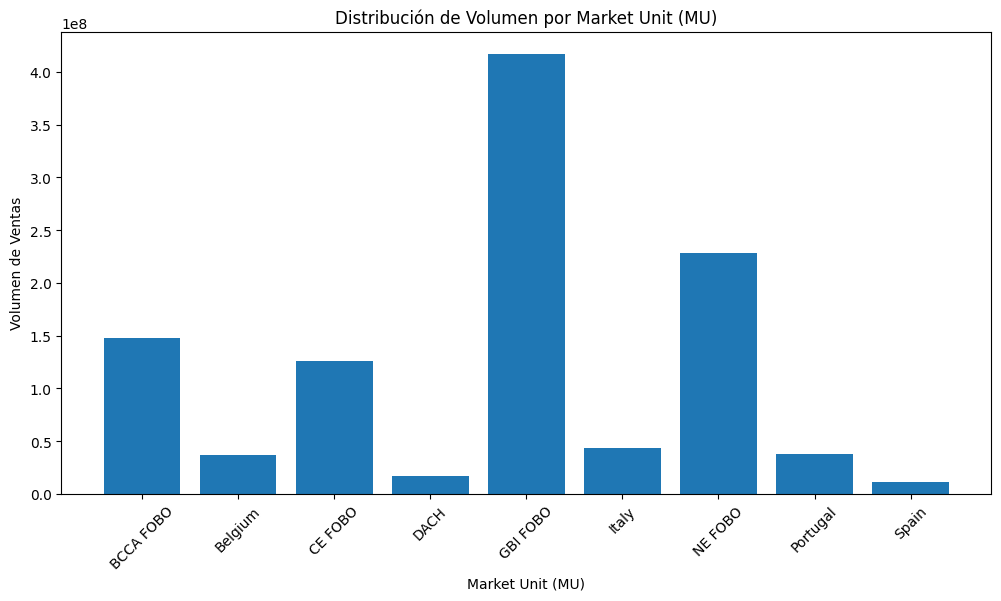

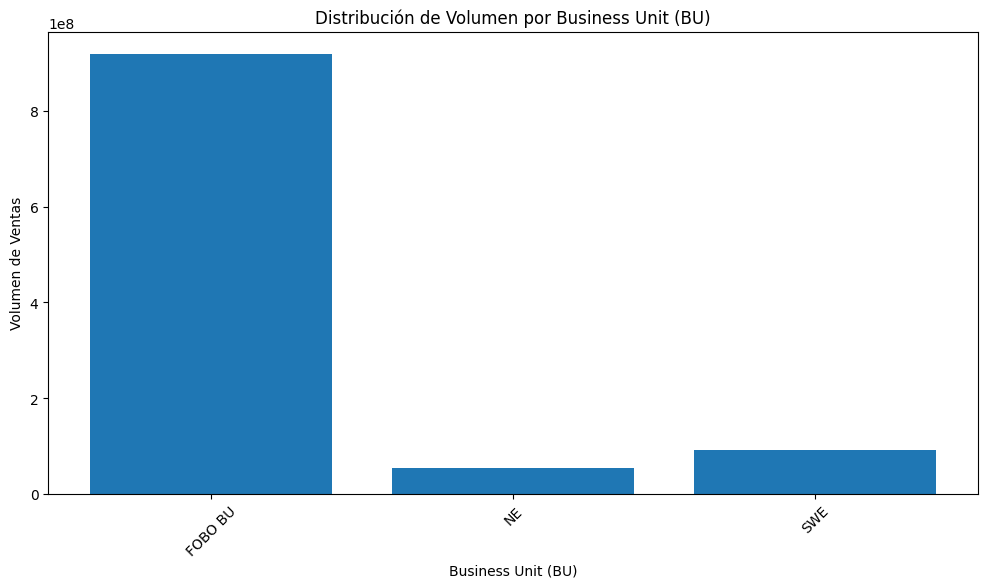

In [ ]:
# Agrupa los datos por MU y calcula el volumen total en cada MU
mu_volumen = df.groupby('MU')['AMT'].sum()

# Agrupa los datos por BU y calcula el volumen total en cada BU
bu_volumen = df.groupby('BU')['AMT'].sum()

# Grafica la distribución de volumen por Market Unit (MU)
plt.figure(figsize=(12, 6))
plt.bar(mu_volumen.index, mu_volumen.values)
plt.xlabel('Market Unit (MU)')
plt.ylabel('Volumen de Ventas')
plt.title('Distribución de Volumen por Market Unit (MU)')
plt.xticks(rotation=45)  # Para mejorar la legibilidad de las etiquetas
plt.show()

# Grafica la distribución de volumen por Business Unit (BU)
plt.figure(figsize=(12, 6))
plt.bar(bu_volumen.index, bu_volumen.values)
plt.xlabel('Business Unit (BU)')
plt.ylabel('Volumen de Ventas')
plt.title('Distribución de Volumen por Business Unit (BU)')
plt.xticks(rotation=45)  # Para mejorar la legibilidad de las etiquetas
plt.show()

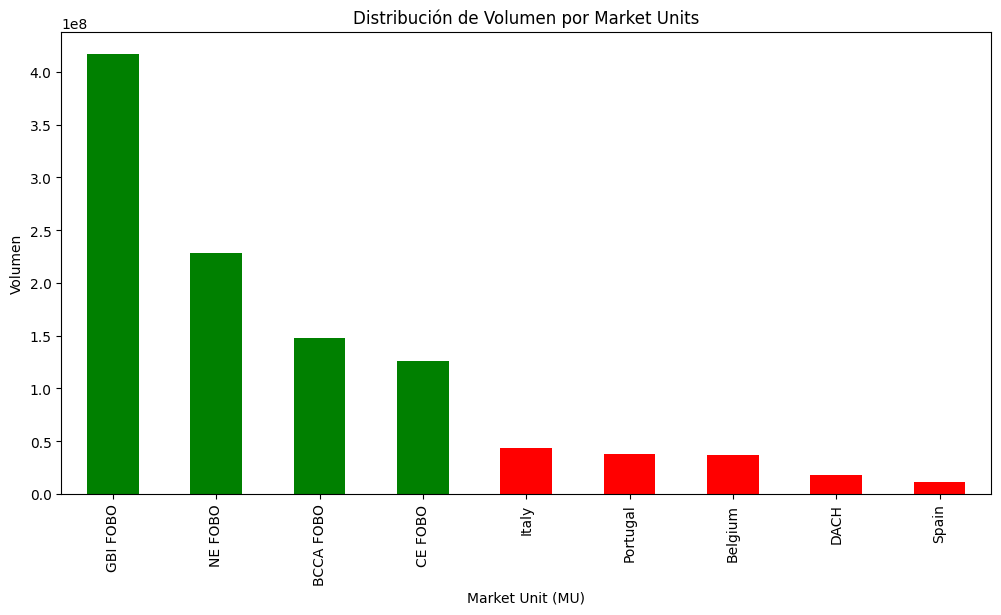

In [ ]:
mu_volumen = mu_volumen.sort_values(ascending=False)

# Calcular las MU con más volumen
top_mu = mu_volumen.nlargest(4)  # Tomamos solo las 4 primeras MU con más volumen.

# Crear una lista de colores en función de si la MU está en las 4 primeras o no
colores = ['green' if mu in top_mu.index else 'red' for mu in mu_volumen.index]

# Crear un gráfico de barras con colores personalizados
plt.figure(figsize=(12, 6))
mu_volumen.plot(kind="bar", color=colores)
plt.title("Distribución de Volumen por Market Units")
plt.xlabel("Market Unit (MU)")
plt.ylabel("Volumen")
plt.show()

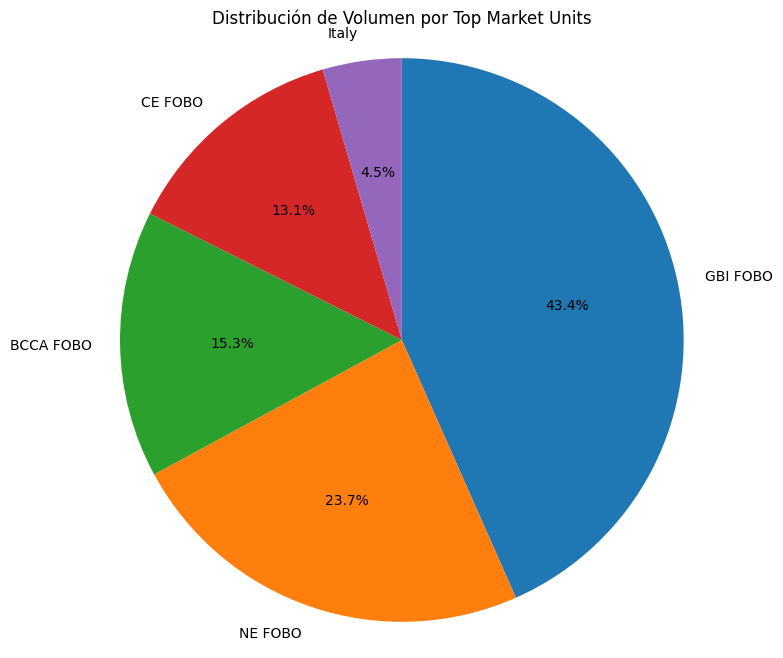

In [ ]:
# Calcular las MU con más volumen
top_mu = mu_volumen.nlargest(5)  # Aquí puedes elegir la cantidad de MU que deseas mostrar.

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(top_mu, labels=top_mu.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Distribución de Volumen por Top Market Units")
plt.axis('equal')  # Esto asegura que el gráfico de pastel sea un círculo.
plt.show()

In [ ]:
# Filtra los datos para mostrar solo registros de España
espana_data = df[df['CNTRY'] == 'Spain']

# Si hay registros de España, obtén el nombre de la Business Unit correspondiente
if not espana_data.empty:
    bu_espana = espana_data['BU'].iloc[0]  # Obtén el nombre de la BU de España
    print(f"España pertenece a la Business Unit: {bu_espana}")
else:
    print("No se encontraron registros para España en tus datos.")

España pertenece a la Business Unit: SWE


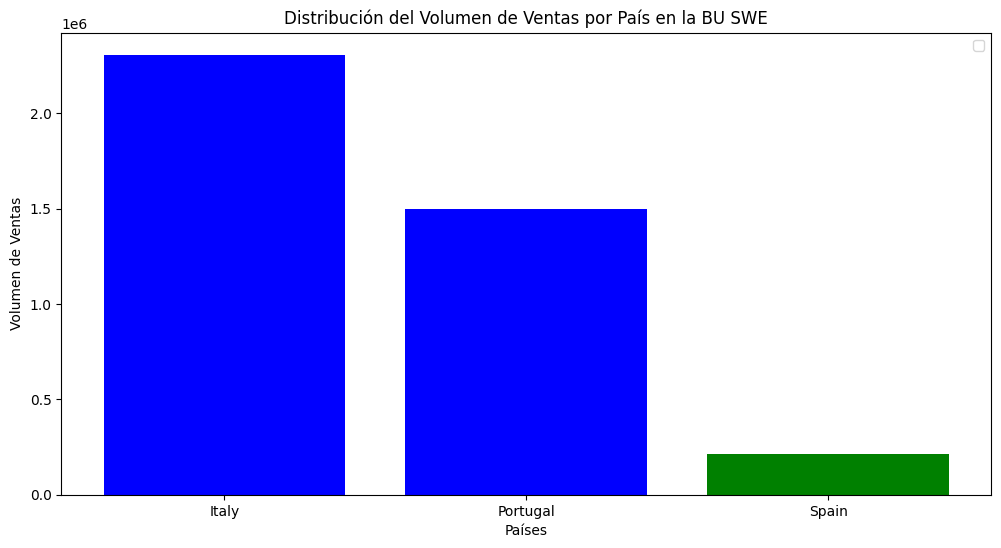

In [ ]:
# Una vez identificada la BU, cogemos los valores que correspondan a esa BU
bu_data = df[df['BU'] == bu_espana]

# Ordena los registros de la BU en función del volumen de ventas
bu_data_ordenada = bu_data.sort_values(by='AMT', ascending=False)

colores = ['blue' if country != 'Spain' else 'green' for country in bu_data_ordenada['CNTRY']]

plt.figure(figsize=(12, 6))
plt.bar(bu_data_ordenada['CNTRY'], bu_data_ordenada['AMT'], color=colores)
plt.xlabel('Países')
plt.ylabel('Volumen de Ventas')
plt.title('Distribución del Volumen de Ventas por País en la BU SWE')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

<ipython-input-86-6158a4b8752c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_espana['DATE'] = pd.to_datetime(ventas_espana['DATE'])


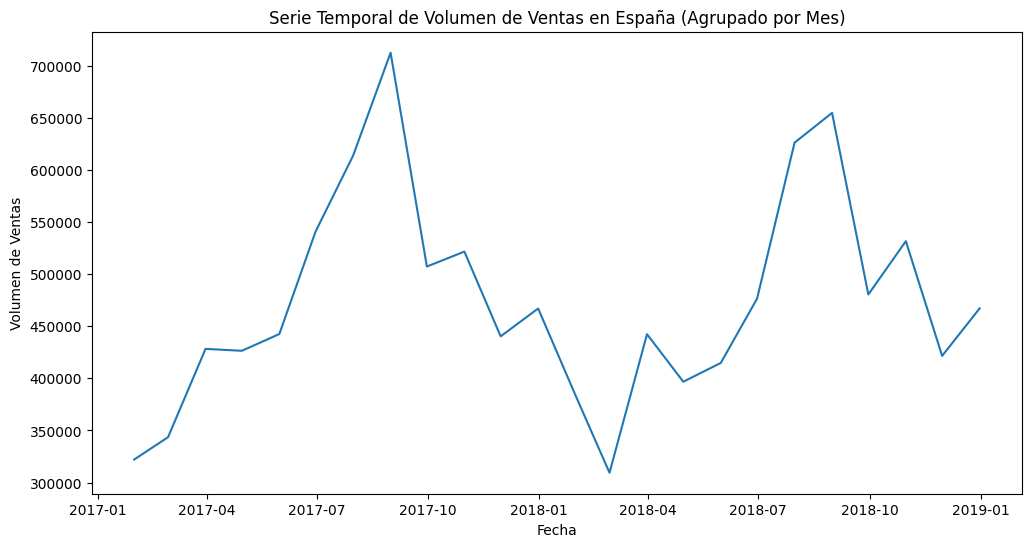

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame 'ventas_espana' con una columna 'DATE' de tipo 'str' que contiene fechas en formato 'YYYY-MM-DD'
ventas_espana = df[df['CNTRY'] == 'Spain']

# Convierte la columna 'DATE' en tipo datetime
ventas_espana['DATE'] = pd.to_datetime(ventas_espana['DATE'])

# Establece la columna 'DATE' como índice
ventas_espana.set_index('DATE', inplace=True)

# Ahora puedes agrupar los datos por mes y sumar el volumen de ventas
ventas_mensuales = ventas_espana['AMT'].resample('M').sum()

# Trama la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales)
plt.title('Serie Temporal de Volumen de Ventas en España (Agrupado por Mes)')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Ventas')
plt.show()

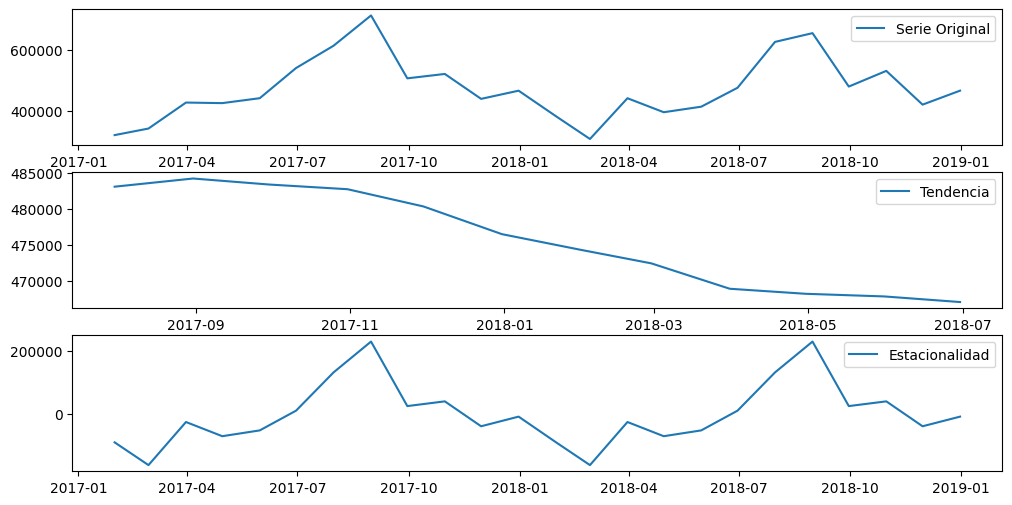

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Define la frecuencia de la serie, por ejemplo, mensual
frecuencia = 12

# Realiza un análisis de descomposición de la serie de tiempo
descomposicion = seasonal_decompose(ventas_mensuales, model='additive', period=frecuencia)

# Visualiza la serie original, tendencia y estacionalidad
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.plot(ventas_mensuales, label='Serie Original')
plt.legend()
plt.subplot(312)
plt.plot(descomposicion.trend, label='Tendencia')
plt.legend()
plt.subplot(313)
plt.plot(descomposicion.seasonal, label='Estacionalidad')
plt.legend()